In [122]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from copy import deepcopy

import sys
import os
import subprocess
import glob
from collections import defaultdict

In [123]:
directory = "/home/ian/Projects/work/md-lv/simulations/replica_unitbox_v11_vf5_t1e-4"

In [124]:
%cd $directory

/home/ian/Projects/work/md-lv/simulations/replica_unitbox_v11_vf5_t1e-4


In [125]:
pwd

'/home/ian/Projects/work/md-lv/simulations/replica_unitbox_v11_vf5_t1e-4'

In [126]:
def fetch_xyz(file, dim=2, stride=1):
    assert(dim==2 or dim==3)
    output = []
    idx = 0
    with open(file, "r") as xyz:
        try:
            while True:
                N = int(xyz.readline())
                xyz.readline()
                arr = np.empty((N, dim))
                for i in np.arange(N):
                    line = xyz.readline()
                    _, x, y, _ = line.split()
                    if dim == 2:
                        arr[i] = np.array([float(x), float(y)])
                    else:
                        arr[i] = np.array([float(x), float(y), float(z)])
                if idx % stride == 0:
                    output.append(arr)
        except:
            pass
    return np.array(output)

def msd_simple(traj, ref=0):
    shape = traj.shape
    timesteps = shape[0]
    N = shape[1]
    oN = 1/N
    dim = shape[2]

    msd = np.zeros((timesteps-ref))
    for i in np.arange(ref, timesteps):
        msd[i] = np.mean(np.square(np.linalg.norm(traj[i] - traj[ref], axis=-1)))
    return msd

def msd_wrap(traj, V, ref=0):
    L=np.sqrt(V)
    L2 = L/2
    shape = traj.shape
    timesteps = shape[0]
    N = shape[1]
    oN = 1/N
    dim = shape[2]

    wrap = np.zeros((N, dim))

    msd = np.zeros((timesteps-ref-1))
    for i in np.arange(ref+1, timesteps):
        diff = traj[i] - traj[i-1]
        cond1 = diff > L2
        cond2 = diff < -L2
        wrap += cond2.astype(int) - cond1.astype(int)

        msd[i-ref-1] = np.mean(np.square(np.linalg.norm(traj[i] + L*wrap - traj[ref], axis=-1)))
    return msd, wrap

def msd_wrap_drift(traj, V, ref=0):
    L=np.sqrt(V)
    L2 = L/2
    shape = traj.shape
    timesteps = shape[0]
    N = shape[1]
    oN = 1/N
    dim = shape[2]

    wrap = np.zeros((N, dim))

    msd = np.zeros((timesteps-ref))
    
    for i in np.arange(ref+1, timesteps):
        diff = traj[i] - traj[i-1]
        cond1 = diff > L2
        cond2 = diff < -L2
        wrap += cond2.astype(int) - cond1.astype(int)

        move = traj[i] + L*wrap - traj[ref]

        drift = np.mean(move, axis=0)

        msd[i-ref] = np.mean(np.square(np.linalg.norm(move-drift, axis=-1)))
    return msd, wrap

In [156]:
trajs = sorted(glob.glob("traj_*_step1000000_*"))
logs = sorted(glob.glob("log_*_step1000000_*"))

In [157]:
for i in 

(1000, 1000)

In [158]:
trajs[0], logs[0]

('traj_init_compress_replica_n10_v11_vf5_t0.0001_step1000000_dt0.001_visc5_seed0_out1000.xyz',
 'log_Ib_init_compress_replica_n10_v11_vf5_t0.0001_step1000000_dt0.001_visc5_seed0_out1000.dat')

In [159]:
len(logs)

1000

In [160]:
data = []
for l in logs:
    data.append(np.loadtxt(l))
data = np.array(data)[:,:]

In [161]:
msd_data_drift = []
for j in np.arange(len(trajs)):
    i = j
    if i%1000 == 0:
        print(len(trajs), i)
    f = trajs[i]
    xyz = fetch_xyz(f)
    msd_t, _ = msd_wrap_drift(xyz, 11, ref=0)
    msd_data_drift.append(msd_t)
msd_data_drift = np.array(msd_data_drift)

1000 0


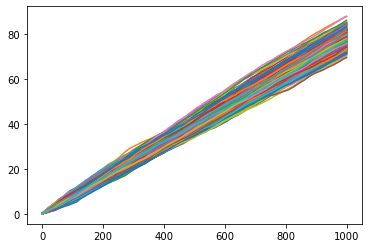

In [162]:
for i in np.arange(0,len(data), 1):
    plt.plot(data[i]-data[i,0])

In [144]:
#import mpmath as mp
import scipy as sp
from scipy import special

In [145]:
cp_data = deepcopy(data)

In [146]:
data.shape

(51, 1000)

In [147]:
cp_factor = deepcopy(cp_data)
for i in np.arange(cp_data.shape[1]):
    cp_factor[:,i] -= cp_data[:,0]

In [148]:
cp_factor

array([[ 0.        ,  0.09277993,  0.17001027, ..., 83.70270809,
        83.80545897, 83.87257365],
       [ 0.        ,  0.10521653,  0.20852686, ..., 78.81480509,
        78.86334934, 78.92825793],
       [ 0.        ,  0.11564767,  0.17628185, ..., 74.51070679,
        74.60749033, 74.70173153],
       ...,
       [ 0.        ,  0.12344639,  0.23032134, ..., 73.08673787,
        73.16756859, 73.26102278],
       [ 0.        ,  0.16827423,  0.31267884, ..., 75.73744111,
        75.82125877, 75.8899306 ],
       [ 0.        ,  0.14048905,  0.20749932, ..., 77.26002708,
        77.32784661, 77.4162603 ]])

In [149]:
cp_data[:,0]

array([ 2.07489199e-04,  2.98909315e-04,  2.01964582e-05,  7.14939652e-05,
        5.40080515e-04,  7.75239578e-05,  3.35366479e-04,  1.67970126e-05,
        6.62474355e-04, -2.15299560e-04,  5.79041416e-04,  3.79331752e-04,
       -7.56602662e-05,  1.42345353e-04,  1.81253654e-04,  1.30960394e-04,
        1.19646312e-04,  3.93992107e-04, -1.35939810e-04,  4.43067123e-04,
       -1.81274445e-04,  1.96010838e-04, -1.26362936e-04, -1.22073843e-04,
        3.47770445e-04,  3.63255112e-04,  4.30855091e-04,  2.56682296e-04,
        3.33209963e-04,  1.71682078e-04,  3.00328565e-04,  2.59521420e-04,
        9.49842660e-05,  3.60845219e-04,  2.67443221e-04,  1.59135110e-04,
        2.51552717e-04,  2.69968603e-04,  3.22655047e-04,  4.91390614e-05,
        2.96720725e-04,  8.64166114e-05,  6.30136732e-05, -3.11015960e-05,
        1.68382051e-04, -1.07088494e-04,  4.82025821e-04,  2.83413743e-04,
        1.05512029e-04,  4.44074347e-04, -2.48548206e-04])

In [344]:
data[-5:]

array([[101.13277677, 101.36883843, 101.61012131, ..., 228.32718211,
        228.57922292, 228.82817498],
       [170.3443599 , 170.65214388, 170.95017911, ..., 297.39662039,
        297.66502011, 297.93145257],
       [ 57.30878723,  57.54461907,  57.76651349, ..., 160.66137032,
        160.83125199, 160.99808339],
       [ 65.35217723,  65.47140436,  65.5946468 , ..., 103.49576039,
        103.53946417, 103.59211935],
       [139.30677613, 139.49531886, 139.66164918, ..., 249.67894089,
        249.85934539, 250.03789359]])

In [117]:
new_data = (data - data.mean(axis=0))

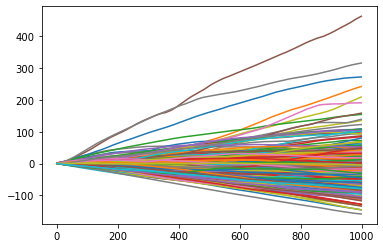

In [118]:
for i in np.arange(0,len(new_data), 50):
    plt.plot(data[i])

In [150]:
def get_bias_quantity(factor, temperature, quantity):
#     cp_factor = deepcopy(factor)
#     for i in np.arange(factor.shape[1]):
#         cp_factor[:,i] -= factor[:,0]
    P = -factor/temperature
    norm = sp.special.logsumexp(P, axis=0)
    numerator = sp.special.logsumexp(P, b=quantity, axis=0)
    return np.exp(numerator-norm)

In [151]:
cut = 10000
bias = get_bias_quantity(data[:cut], 1e-4, msd_data_drift[:cut])

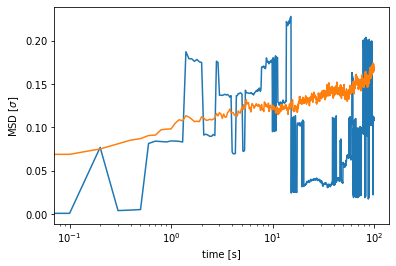

In [155]:
x = np.linspace(0, msd_data_drift[0].shape[-1]/10, msd_data_drift[0].shape[0])
x2 = np.linspace(0, msd_data_drift[0].shape[-1]/10, val_msd_data_drift[5][0].shape[0])
plt.plot(x, bias)
plt.plot(x, np.mean(msd_data_drift, axis=0))
#plt.plot(x2, np.mean(val_msd_data_drift[5], axis=0))
#plt.plot(x, np.exp(amin)/np.exp(a2min))
plt.xlabel("time [s]")
plt.ylabel(r"MSD [$\sigma$]")
plt.xscale('log')

In [66]:
val_files = sorted(glob.glob("../msd_validation_actual/traj_*t0.0001*_step1000000_*"))

In [75]:
val_files[0:10]

['../msd_validation_actual/traj_n10_v11_t0.0001_step1000000_dt0.001_visc5_seed6010_out100.xyz',
 '../msd_validation_actual/traj_n10_v11_t0.0001_step1000000_dt0.001_visc5_seed6011_out100.xyz',
 '../msd_validation_actual/traj_n10_v11_t0.0001_step1000000_dt0.001_visc5_seed6012_out100.xyz',
 '../msd_validation_actual/traj_n10_v11_t0.0001_step1000000_dt0.001_visc5_seed6013_out100.xyz',
 '../msd_validation_actual/traj_n10_v11_t0.0001_step1000000_dt0.001_visc5_seed6014_out100.xyz',
 '../msd_validation_actual/traj_n10_v11_t0.0001_step1000000_dt0.001_visc5_seed6015_out100.xyz',
 '../msd_validation_actual/traj_n10_v11_t0.0001_step1000000_dt0.001_visc5_seed6016_out100.xyz',
 '../msd_validation_actual/traj_n10_v11_t0.0001_step1000000_dt0.001_visc5_seed6017_out100.xyz',
 '../msd_validation_actual/traj_n10_v11_t0.0001_step1000000_dt0.001_visc5_seed6018_out100.xyz',
 '../msd_validation_actual/traj_n10_v11_t0.0001_step1000000_dt0.001_visc5_seed6019_out100.xyz']

In [68]:
len(val_files)

200

In [76]:
val_msd_data_drift.keys()

dict_keys([11.0, 5.0])

In [69]:
val_msd_data_drift = defaultdict(list)
for i in np.arange(len(val_files)):
    if i%100 == 0:
        print(len(val_files), i)
    f = val_files[i]
    vol = float(f.split("_")[4][1:])
    xyz = fetch_xyz(f)
    msd_t, _ = msd_wrap_drift(xyz, vol, ref=0)
    val_msd_data_drift[vol].append(msd_t)

200 0
200 100


In [73]:
val_msd_data_drift[5]

[array([0.00000000e+00, 1.06587979e-04, 4.12666547e-04, ...,
        1.32096250e-01, 1.31956497e-01, 1.31976258e-01]),
 array([0.        , 0.00017976, 0.00059717, ..., 0.10519915, 0.10512999,
        0.10475755]),
 array([0.00000000e+00, 9.59994037e-05, 3.48777833e-04, ...,
        1.21475963e-01, 1.21585295e-01, 1.21751454e-01]),
 array([0.00000000e+00, 7.60386242e-05, 2.73072829e-04, ...,
        9.01856779e-02, 9.01229807e-02, 8.96635982e-02]),
 array([0.        , 0.00013138, 0.00049961, ..., 0.11055005, 0.11067307,
        0.11120325]),
 array([0.        , 0.00027943, 0.00096996, ..., 0.11135006, 0.11112311,
        0.11143766]),
 array([0.00000000e+00, 1.44310830e-04, 5.34367113e-04, ...,
        1.48799206e-01, 1.48836734e-01, 1.48397331e-01]),
 array([0.        , 0.00020515, 0.00071549, ..., 0.10169822, 0.10234711,
        0.1019597 ]),
 array([0.00000000e+00, 9.28346392e-05, 3.04051258e-04, ...,
        1.42924741e-01, 1.42871477e-01, 1.42989543e-01]),
 array([0.        , 0.000

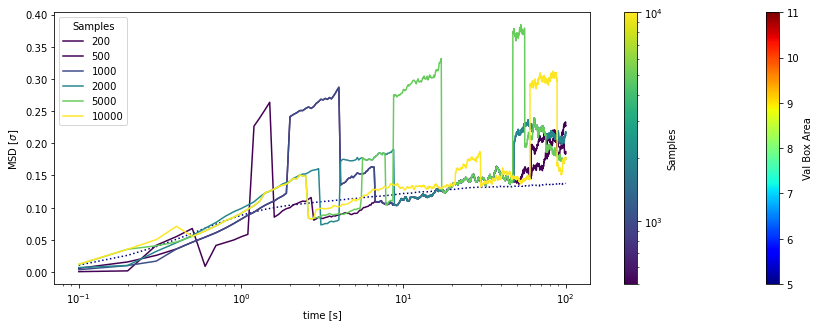

In [446]:
cmap = mpl.cm.jet
norm = mpl.colors.Normalize(vmin=5, vmax=11)
cmap2 = mpl.cm.viridis
norm2 = mpl.colors.LogNorm(vmin=500, vmax=10000)
max_t = 10000
plt.figure(figsize=(15,5))
for label, dat in val_msd_data_drift.items():
    if label == 11:
        continue
    plt.plot(np.linspace(0, dat[0].shape[-1]/100, dat[0].shape[-1])[10:max_t:10], np.mean(dat[:200], axis=0)[10:max_t:10], ":", color=cmap(norm(label)), alpha=1)
    x2 = np.linspace(0, dat[0].shape[-1]/100, dat[0].shape[-1])[10:max_t:10]
    y2 = np.mean(dat[:200], axis=0)[10:max_t:10]
    #break
x = np.linspace(0, msd_data_drift[0].shape[-1]/10, msd_data_drift[0].shape[0])
#plt.plot(x[1:], np.mean(msd_data_drift, axis=0)[1:], ":", color=cmap(norm(11)))

for cut in [200, 500, 1000, 2000, 5000, 10000]:
    bias = get_bias_quantity(data[:cut], 1e-4, msd_data_drift[:cut])
    plt.plot(x[1:], bias[1:], color=cmap2(norm2(cut)), label=cut)
plt.xlabel("time [s]")
plt.ylabel(r"MSD [$\sigma$]")
plt.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm), label="Val Box Area")
plt.colorbar(mpl.cm.ScalarMappable(cmap=cmap2, norm=norm2), label="Samples")
#plt.savefig("MSD.png")
#plt.title(f"N={len(trajs)}")
plt.legend(title="Samples")
#plt.yscale('log')
plt.xscale('log')

Text(0, 0.5, 'bias factor')

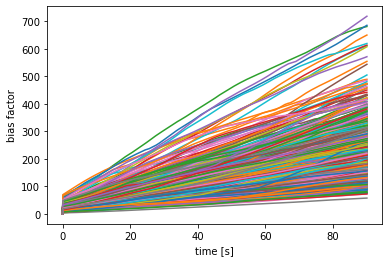

In [267]:
for i in np.arange(0,len(data), 5):
    plt.plot(x, data[i])

plt.xlabel("time [s]")
plt.ylabel("bias factor")

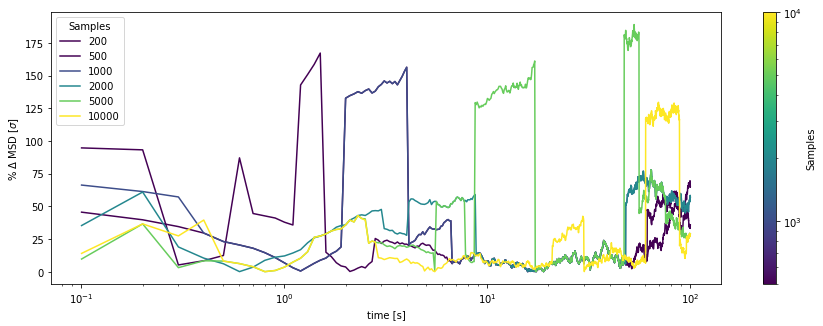

In [464]:
cmap = mpl.cm.jet
norm = mpl.colors.Normalize(vmin=5, vmax=11)
cmap2 = mpl.cm.viridis
norm2 = mpl.colors.LogNorm(vmin=500, vmax=10000)
max_t = 10000
plt.figure(figsize=(15,5))
for label, dat in val_msd_data_drift.items():
    if label == 11:
        continue
    #plt.plot(np.linspace(0, dat[0].shape[-1]/100, dat[0].shape[-1])[10:max_t:10], np.mean(dat[:200], axis=0)[10:max_t:10], ":", color=cmap(norm(label)), alpha=1)
    x2 = np.linspace(0, dat[0].shape[-1]/100, dat[0].shape[-1])[10:max_t:10]
    y2 = np.mean(dat[:200], axis=0)[10:max_t:10]
    #break
x = np.linspace(0, msd_data_drift[0].shape[-1]/10, msd_data_drift[0].shape[0])
#plt.plot(x[1:], np.mean(msd_data_drift, axis=0)[1:], ":", color=cmap(norm(11)))

for cut in [200, 500, 1000, 2000, 5000, 10000]:
    bias = get_bias_quantity(data[:cut], 1e-4, msd_data_drift[:cut])
    plt.plot(x[1:], 100*np.abs(bias[1:]-y2)/y2, color=cmap2(norm2(cut)), label=cut)
plt.xlabel("time [s]")
plt.ylabel(r"% $\Delta$ MSD [$\sigma$]")
#plt.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm), label="Val Box Area")
plt.colorbar(mpl.cm.ScalarMappable(cmap=cmap2, norm=norm2), label="Samples")
#plt.savefig("MSD.png")
#plt.title(f"N={len(trajs)}")
plt.legend(title="Samples")
#plt.yscale('log')
plt.xscale('log')

In [465]:
def get_log_norm_numerator(factor, temperature, quantity):
    cp_factor = deepcopy(factor)
    for i in np.arange(factor.shape[1]):
        cp_factor[:,i] -= factor[:,0]
    P = -factor/temperature
    norm = sp.special.logsumexp(P, axis=0)
    numerator = sp.special.logsumexp(P, b=quantity, axis=0)
    return norm, numeratorlse 

In [545]:
cut = 10000
norm, numerator = get_log_norm_numerator(data[:cut], 1, msd_data_drift[:cut])

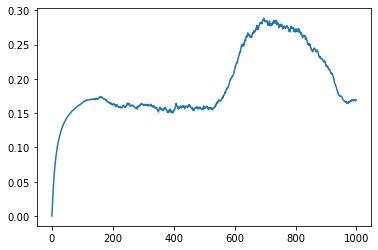

In [546]:
plt.plot(np.exp(numerator-norm))

In [475]:
from mpmath import mp

In [694]:
mp.dps = 100

In [695]:
mp.prec

336

In [692]:
mp.prec = 300

In [684]:
def logsumexp_mp(array):
    maxs = np.max(array, axis=0)
    out = np.zeros_like(maxs)
    for i in np.arange(array.shape[1]):
        summ = mp.mpf(0.0)
        for j in np.arange(array.shape[0]):
            summ += mp.exp(array[j,i]-maxs[i])
        out[i] = float(mp.log(summ)) + maxs[i]
    return out

def logsumexp_weight_mp(array, weight):
    maxs = np.max(array, axis=0)
    out = np.zeros_like(maxs)
    for i in np.arange(array.shape[1]):
        summ = mp.mpf(0.0)
        for j in np.arange(array.shape[0]):
            summ += weight[j,i]*mp.exp(array[j,i]-maxs[i])
        out[i] = float(mp.log(summ)) + maxs[i]
    return out

In [602]:
def get_underflow(array):
    out = np.zeros_like(array)
    maxs = np.max(array, axis=0)
    print(array.shape, out.shape, maxs.shape)
    for i in np.arange(array.shape[1]):
        out[:,i] = np.exp(array[:,i]-maxs[i])
    return np.count_nonzero(out==0, axis=0)/array.shape[0]

In [649]:
def get_bias_quantity_mp(factor, temperature, quantity):
    P = np.array(-factor/temperature, dtype=np.float64)
    print(P.shape)
    print(quantity.shape)
    norm = logsumexp_mp(P)
    numerator = logsumexp_weight_mp(P, quantity)
    return np.exp(numerator-norm)

In [652]:
def get_bias_underflow(factor, temperature, quantity):
    P = np.array(-factor/temperature, dtype=np.float64)
    norm_zero = get_underflow(P)
    return norm_zero

In [653]:
cut = 10000
eff = get_bias_underflow(data[:cut,::1], 1e-4, msd_data_drift[:cut,::1])

(10000, 1000) (10000, 1000) (1000,)


In [696]:
cut = 10000
bias2 = get_bias_quantity_mp(data[:cut,::100], 1e-4, msd_data_drift[:cut,::100])

(10000, 10)
(10000, 10)


In [697]:
bias2

array([0.        , 0.13028674, 0.13382646, 0.13184955, 0.14735173,
       0.14778642, 0.14460422, 0.30332775, 0.29696288, 0.16241555])

In [698]:
bias2

array([0.        , 0.13028674, 0.13382646, 0.13184955, 0.14735173,
       0.14778642, 0.14460422, 0.30332775, 0.29696288, 0.16241555])

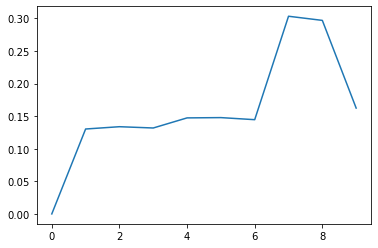

In [699]:
#plt.plot(bias)
plt.plot(bias2)
#plt.yscale('log')
#plt.xscale('log')

Text(0.5, 0, 'Time')

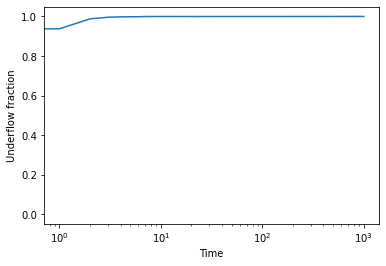

In [633]:
plt.plot(eff)
plt.xscale('log')
plt.ylabel('Underflow fraction')
plt.xlabel('Time')

In [646]:
arr = np.array([mp.mpf(0) for i in range(10)], dtype=object)

In [647]:
arr

array([mpf('0.0'), mpf('0.0'), mpf('0.0'), mpf('0.0'), mpf('0.0'),
       mpf('0.0'), mpf('0.0'), mpf('0.0'), mpf('0.0'), mpf('0.0')],
      dtype=object)

In [642]:
arr[0]

5

Text(0.5, 0, 'Time')

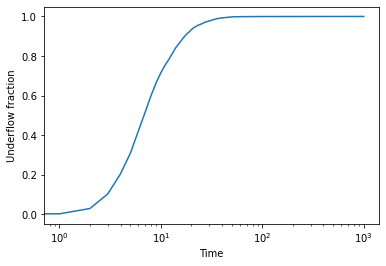

In [607]:
plt.plot(eff)
plt.xscale('log')
plt.ylabel('Underflow fraction')
plt.xlabel('Time')

In [112]:
amin = np.min(data, axis=0)
a2min = np.array([np.min(data[:,i][data[:,i] != amin[i]]) for i in np.arange(data.shape[1])])

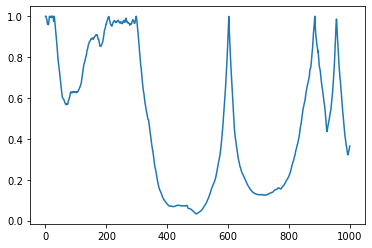

In [113]:
plt.plot(np.exp(amin)/np.exp(a2min))